In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

df = pd.read_csv('benchmark.csv', index_col=False)

df = df.groupby('res').min()   # best of 5

itk_cpu = df.itk_cpu.dropna()
itk_gpu = df.itk_gpu.dropna()
hal_cpu = df.itk_halide_cpu.dropna()
hal_gpu = df.itk_halide_gpu.dropna()

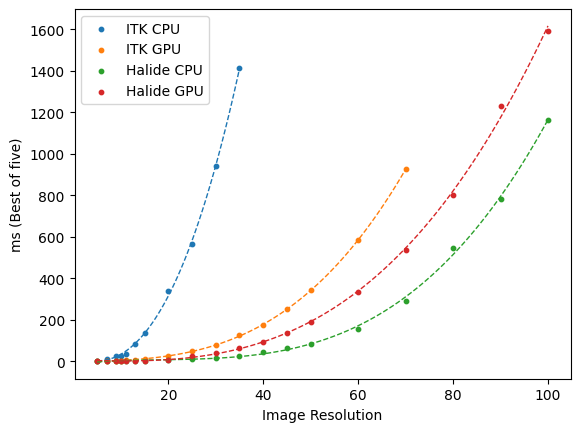

In [2]:
def plot_fit_series(series, label):
    plt.scatter(series.index, series, label=label, s=10)
    plt.plot(*Polynomial.fit(series.index, series, 3).linspace(), ls='dashed', label='_'+label, lw=1)

plot_fit_series(itk_cpu, 'ITK CPU')
plot_fit_series(itk_gpu, 'ITK GPU')
plot_fit_series(hal_cpu, 'Halide CPU')
plot_fit_series(hal_gpu, 'Halide GPU')

plt.xlabel('Image Resolution')
plt.ylabel('ms (Best of five)')
_ = plt.legend()